<a name='toc'></a>
#<font color=#F46767><b> 💣 Exploring Terror in Europe</b> (2000 - 2020) 🔥</font>

> _"The GTD--Global Terrorism Database-- defines a terrorist attack as the threatened or actual use of illegal force and violence by a nonstate actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."_

<br>

## &#9889; _General_<br>

  - <font color='darkturquoise'>Scope</font>:
  Analyze terrorist incidents in Europe from January 1, 2000 through December 31, 2020 using the GTD dataset.

  - <font color='darkturquoise'>Objective</font>:
    - `Primary Obj-0`: _"How did the nature, lethality, and modus operandi of terrorist activity evolve across Europe from 2000 to 2020?"_
    - `Secondary Obj-1`: _"Which perpetrator groups changed their preferred attack types or target profiles over the two decades, and when did those shifts occur?"_
    - `Secondary Obj-2`: _"What country-to-country “spill-over” patterns exist?"_


<br>

##<img src="https://img.icons8.com/?size=100&id=yTvVS6whPDpp&format=png&color=000000" width="30" height="30"/> Main File Structure

&emsp;&emsp;
<img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> gtd_project/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> source_files/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> notebooks/<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part1_etl.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj0.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj1.ipynb<br>
&emsp;&emsp;&emsp;&emsp;
&#x2514;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_part2_obj2.ipynb<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> gtd_util.py/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> etl_outputs/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> images/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='25' height='25'/> processed_data/<br>
&emsp;&emsp;
&#x2514;&#x2500; <img src="https://img.icons8.com/?size=100&id=VUckOuTyLQ7W&format=png&color=19B1FC" width='25' height='25'/> README.md<br>
<br>

###<img src="https://img.icons8.com/?size=100&id=XOQ8AO4LZthX&format=png&color=000000" width="30" height="30"/>References
1. START (National Consortium for the Study of Terrorism and Responses to Terrorism). (2022). Global Terrorism Database, 1970 - 2020. <a href="https://www.start.umd.edu/gtd">Dataset</a>&emsp;<a href="https://www.start.umd.edu/sites/default/files/2024-10/Codebook.pdf">Codebook</a>&emsp;<a href="https://www.start.umd.edu/gtd-terms">TermsOfUse</a>
2. Icons by [icons8](https://icons8.com)

In [42]:
# general libs
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from collections import defaultdict

# graphics libs
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap

%matplotlib inline

In [2]:
# defining the project directory to work with along with geodata's source file

PROJECT_PATH = '/content/drive/MyDrive/pf_pjs/gtd_project'
GEODATA_PATH = '/source_files/custom_geodata_10m.geojson'

%cd $PROJECT_PATH

/content/drive/MyDrive/pf_pjs/gtd_project


In [3]:
# pandas global setting
pd.options.display.max_columns = None

# ignore warnings
warnings.filterwarnings('ignore')

In [4]:
gtd = pd.read_pickle('etl_outputs/gtd_final.pkl')

In [5]:
gtd.columns

Index(['id', 'date', 'five_year', 'quarter', 'year', 'month', 'month_name',
       'day', 'region', 'country', 'alpha2', 'alpha3', 'province_state',
       'city', 'lat', 'lon', 'is_success', 'is_suicide', 'is_property_damaged',
       'terr_group', 'is_claimed', 'attack_type', 'weapon_type',
       'weapon_subtype', 'target_type', 'target_subtype', 'target_nationality',
       'fatalities_total', 'fatalities_terrorists', 'wounded_total',
       'wounded_terrorists', 'is_hostage', 'hostages_total',
       'hostage_duration', 'is_ransom'],
      dtype='object')

In [6]:
# an adjustment so the geodata align with the GTD dataframe
gtd['alpha3'] = gtd['alpha3'].cat.remove_categories('XKX')
gtd['alpha3'] = gtd['alpha3'].cat.add_categories(['KOS'])
gtd.loc[gtd.alpha3.isna(), 'alpha3'] = 'KOS'

<a name='eda'></a>
##<img src="https://img.icons8.com/?size=100&id=21144&format=png&color=000000" width="25" height="25"/> <font color=orange><b>Analysis</b></font>

### <font color='skyblue'>**Temporal, spatial, categorical overviews** (Obj-0)</font>:
- Yearly attacks & fatalities line plots.
- Heatmap: month&ndash;year incidents.
- Choropleth: attacks per country.
- Top-5 attack & weapon types.

#### <font color='coral'>Yearly Attacks & Fatality Counts</font>

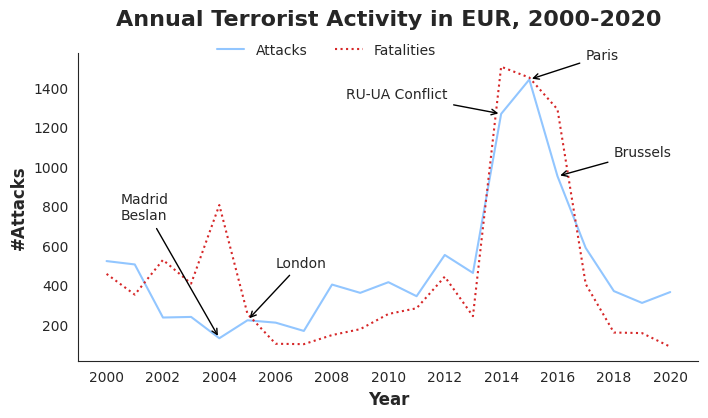

In [ ]:
#--------------------- CALCULATING ATTACKS & FATALITIES --------------------------

# calculating annual incidents and fatalities
annual_incid = (gtd.groupby('year')
                .agg(attacks=('id','size'))
                .reset_index())

annual_fatal = (gtd[['year', 'fatalities_total']]
                .replace('UKN', 0)
                .groupby('year')
                .agg(fatalities=('fatalities_total','sum'))
                .reset_index())


# calculating highlights
madrid_train = annual_incid[annual_incid.year == 2004].attacks.values[0]
london_subway = annual_incid[annual_incid.year == 2005].attacks.values[0]
EUR_recession = annual_incid[annual_incid.year == 2008].attacks.values[0]
russia_ukraine_confl = annual_incid[annual_incid.year == 2014].attacks.values[0]
paris_ISIS = annual_incid[annual_incid.year == 2015].attacks.values[0]
brussel_IS = annual_incid[annual_incid.year == 2016].attacks.values[0]
covid19 = annual_incid[annual_incid.year == 2019].attacks.values[0]

#------------------------------ PLOTTING ATTACKS -------------------------------

plt.style.use('seaborn-v0_8-pastel')
sns.set_style('white')

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(annual_incid.year, annual_incid.attacks, label='Attacks')
ax.plot(annual_fatal.year, annual_fatal.fatalities, label='Fatalities', linestyle='dotted', color='tab:red')


ax.set_title('Annual Terrorism Activity in EUR\n', weight='bold', fontsize=16, pad=3)
ax.set_xlabel('Year', weight='bold', fontsize=12)
ax.set_ylabel('#Attacks', weight='bold', fontsize=12)
ax.set_xticks(range(2000, 2021, 2))
ax.legend(loc='upper center',  ncol=2, bbox_to_anchor=(0.4, 1.05),borderaxespad=0,
           frameon=False, title_fontproperties={'weight' : 'bold'})

#-------------------------- ANNOTATING SPECIFIC ATTACKS ---------------------------

ax.annotate('Madrid\nBeslan', xy=(2004, madrid_train), xytext=(2004-3.5, madrid_train+600),
            arrowprops=dict(arrowstyle="->", linewidth=1, color='k'))
ax.annotate('London', xy=(2005, london_subway), xytext=(2005+1, london_subway+270),
            arrowprops=dict(arrowstyle="->", linewidth=1, color='k'))
ax.annotate('RU-UA Conflict', xy=(2014, russia_ukraine_confl), xytext=(2014-5.5, russia_ukraine_confl+80),
            arrowprops=dict(arrowstyle="->", linewidth=1, color='k'))
ax.annotate('Paris', xy=(2015, paris_ISIS), xytext=(2015+2, paris_ISIS+100),
            arrowprops=dict(arrowstyle="->", linewidth=1, color='k'))
ax.annotate('Brussels', xy=(2016, brussel_IS), xytext=(2016+2, brussel_IS+100),
            arrowprops=dict(arrowstyle="->", linewidth=1, color='k'))


sns.despine()
plt.savefig('images/1_annual_attacks-fatalities.png', dpi=600)
plt.show()

<font color='orange'><b>Observations</b></font>

- <font color='seablue'>2000-2003</font>:<br>
  ~450 -> 200 incidents, steady decline while fatalities appear to slide in paraller on average. Post-90s separatist campaigns (eg, IRA cease-fire, ETA truces) winding down along with the anti-ISIS campaign in Afganistan. The overall risk is easing.

- <font color='seablue'>2004-2005</font>:<br>
  Attacks reach their lowest point whereas fatalities spike sharply. Madrid train bombings (191 dead) & Beslan siege (330 dead) in 2004, then London 7/7 in 2005 shows fewer attacks but extremely lethal.

- <font color='seablue'>2006-2013</font>:<br>
  Gradual uptick with small oscillations. Casualties remain moderate. Long tail of single-actor plots and Russian/Caucasus violence shows no continent-wide surge yet.

- <font color='seablue'>2014-2016</font>:<br>
  Explosive rise ~x3 jump peaking in 2015. Fatalities peak one year before the attacks. Two overlapping shocks:
  - Russia-Ukraine conflict adds thousands of coded 'terrorism' events in Eastern Europe (attacks curve).
  - ISIS external ops (Paris, Nice, Brussels) drive fatality spike in 2015; lethality outpaces sheer incident count.

- <font color='seablue'>2017-2020</font>:<br>
  Cliff-edge fall back below 400 whereas fatalities crash to < 100 by 2020. Threat returns to pre-2010 baseline. ISIS territorial collapse plus the aggressive EU Counter-Terrorism (CT) cooperations along with the COVID-19 outbreak.

<br><br>

<font color='orange'><b>Highlights</b></font>

- <font color='seablue'>Casualty-per-attack volatility</font>:<br>
  - 2004 shows ~150 attacks but >800 fatalities -> ~5 deaths/attack.

  - 2015 shows ~1400 attacks and ~1500 fatalities -> ~1 death/attack.

  High-loss events distort yearly lethality; averaging hides that most incidents remain low-casualty.

- <font color='seablue'>Lead-lag between curves</font>:<br>
  The red (fatalities) line peaks a year earlier than the blue (attacks).
  Once security forces adapted, attritional but less deadly incidents persisted into 2016 before both metrics dropped.

- <font color='seablue'>Campaign vs calendar drivers</font>:<br>
  'Shocks' from particular groups or conflicts dominate. Forecasting therefore needs geopolitical triggers more than time-series seasonality.

#### <font color='coral'>Month--Year Heatmap</font>

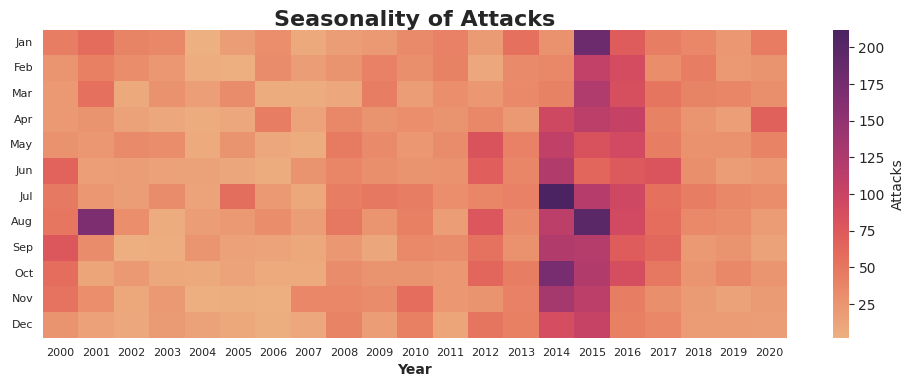

In [ ]:
#------------------ CALCULATING ATTACKS BY MONTH YEARLY ------------------

hm_pivot = (gtd.pivot_table(index='month_name', columns='year',
                            values='id', aggfunc='count')
            .reindex(['Jan','Feb','Mar','Apr','May','Jun',
                      'Jul','Aug','Sep','Oct','Nov','Dec']))


#--------------------------- PLOTTING ATTACKS ----------------------------

plt.figure(figsize=(12, 4))

sns.heatmap(hm_pivot, cmap=sns.color_palette('flare', as_cmap=True),
            cbar_kws={'label':'Attacks'})

plt.title('Seasonality of Attacks in EUR', weight='bold', fontsize=16, pad=0)
plt.xlabel('Year', weight='bold', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('')

plt.savefig('images/2_month-year_heatmap.png', dpi=600)
plt.show()

<font color='orange'><b>Observations</b></font>

- <font color='seablue'>No regular annual seasonality</font><br>
  Colours stay fairly uniform within each row (month) for most years, except for a few isolated spikes.
  European terrorism is driven more by campaign-based or geopolitical events than by seasonality (e.g., holiday periods or anniversaries)

- <font color='seablue'>Single dominant block (2014-2016)</font><br>
  The 2014--2016 years are saturated in dark colors across many months, surpassing every other year.

- <font color='seablue'>Summer preference is mild, not universal</font><br>
  In lower-volume years (2000-2013, 2018-2020) the darker tiles tend to cluster around Jun -> Sep; winter months rarely peak.
  Attackers exploit better mobility, larger public gatherings and tourist traffic in summer, but in high-tempo years that 'seasonal' signature is swamped.

- <font color='seablue'>Sharp collapse after 2016</font><br>
  Years 2017 -> 2020 fade back to light colors.
  Possibly, coordinated Counter-Terrorism (CT) operations, territorial loss of IS, and EU-wide security hardening cut incident frequency quickly along with the COVID-19 pressence.

- <font color='seablue'>Isolated monthly spikes</font><br>
  E.g. Aug 2001, Jul 2014, Aug 2016 stand out even within high-volume periods.
<br><br>


Overall, the heatmap reinforces that European terrorism risk is episodic and campaign-driven, with only a secondary seasonal component.

#### <font color='coral'>Spatial Patterns</font>

In [ ]:
# world geodata info
world = gpd.read_file(GEODATA_PATH)

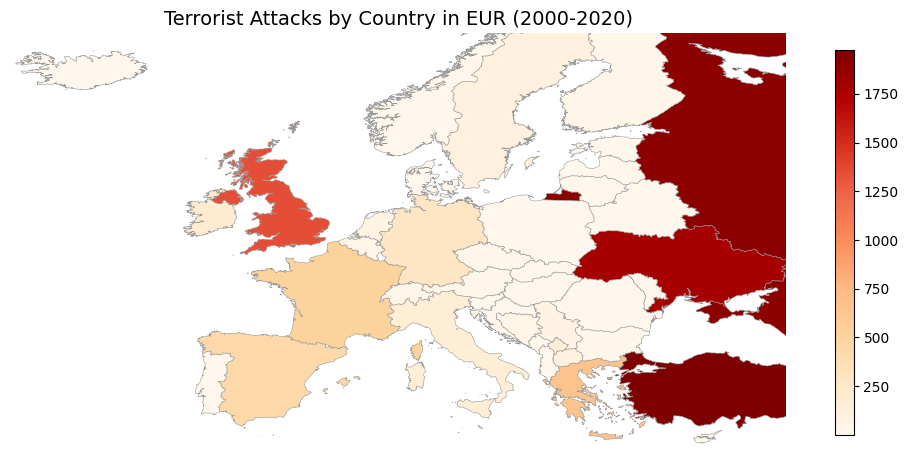

In [ ]:
#------------------ CALCULATING OVERALL ATTACKS BY COUNTRY ------------------

attacks_cntry = (gtd
                 .groupby('alpha3')
                 .size()
                 .rename('attacks')
                 .reset_index())


gdf = world.merge(attacks_cntry,
                  left_on='adm0_a3_us',
                  right_on='alpha3',
                  how='inner')


#------------------------- PLOTTING ATTACKS BY COUNTRY ----------------------

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='attacks',
         cmap='OrRd',
         linewidth=0.4,
         edgecolor='0.6',
         legend=True,
         legend_kwds={'shrink':.5},
         ax=ax)

ax.set_title('Terrorist Attacks by Country in EUR (2000-2020)', fontsize=14)
ax.axis('off')
ax.set_xlim(-25, 40)
ax.set_ylim(34, 68)
plt.tight_layout()

plt.savefig('images/3_attacks_by_country.png', dpi=600)
plt.show()

<font color='orange'><b>Observations</b></font>

- 🔴 **Highest-intensity zones** (Eastern Europe)<br>
  Russia, Turkey, Ukraine dominate the red end of the scale with over 1500 attacks.GTD counts many attacks from:
  - Insurgencies (Chechnya, Dagestan) in Russia.
  - PKK conflict in Turkey.
  - Post-2014 war-related violence in Donbas and Crimea in Ukraine.
  
  These countries' totals are inflated by prolonged internal conflicts, and should be analyzed as a separate cluster from Western European terrorism.
  <br>

- 🟠 **Moderate level zones** (Western Europe)<br>
  - United Kingdom leads with the highest attack count in Western Europe, appearing in dark orange. Includes Northern Ireland-related incidents and UK mainland attacks.
  - France, Spain, Greece, Italy show mid-range activity (orange zones), with hundreds of incidents. Likely includes anarchist, separatist, and jihadist actions.
  - Germany, Netherlands, Belgium are less prominent despite headline-grabbing events — they rank lower in total counts.

  Western European countries tend to have fewer but more lethal or publicized events (e.g., Paris 2015, London 2005), whereas Eastern/Southeastern Europe have more frequent, low-profile incidents.
  <br>


- ⚪ **Low-activity / zero-incident countries**<br>
  - Countries like Norway, Switzerland, the Baltics, Iceland, and much of Eastern/Central Europe appear very light or white. This reflects low incident frequency or none during the 20-year period.
  - Some countries may appear white not due to zero risk, but due to underreporting or GTD classification differences.

In [ ]:
# taking a 30% sample from the GTD to show hotspots
sample = gtd[['lat', 'lon']].sample(frac=0.3, random_state=42)

# creating a framed map
m = folium.Map(location=[54, 15], zoom_start=4, tiles='cartodbpositron')#tiles='cartodbpositron'CartoDB dark_matter

# attach a heatmap
HeatMap(sample, radius=15).add_to(m)
m.save('images/4_hotspots.html')

# display the heatmap
m

<font color='orange'><b>Observations</b></font><br>


---


💥 Concentrated clusters in conflict zones:

  - Eastern Ukraine (Donetsk, Luhansk): Very dense clusters.

  - North Caucasus (Chechnya, Dagestan): Russia shows prolonged, high-intensity activity.

  - Southeastern Turkey: Reflects long-standing insurgency activity from PKK.

  - Balkan Region (Kosovo, Bosnia-Herzegovina): Prolonged conflicts remain between ethnotic groups after the separation of the former Yugoslavia Republic.
<br>

📌 Interpretation: These are classic conflict-driven terrorism zones, where insurgency overlaps with terrorism, and attacks are geographically clustered.

---
<br>

🔥 Major Western European cities light up

  - London, Paris, Madrid, Brussels: Show strong presence even without cluster density.

  - Germany, Spain, Italy, Greece, Portugal, Hungary, Czechia, Bulgaria, Switzerland and Netherlands have scattered events, mostly in urban areas.
<br>

📌 Interpretation: These reflect high-impact but less frequent attacks, often in capital cities or transport hubs.

---
<br>

🧭 Sparse regions provide contrast

  Nordic countries, Baltic states, Iceland, and Eastern Central countries show relatively very low activity.

<br>

📌 Interpretation: These areas experience very low operational tempo, whether due to geographic, political, or demographic factors.
<br><br>

---
---
<font color='orange'><b>Insights</b></font>

The incident hotspot map reveals three primary spatial regimes:
  - Dense clusters in SE Europe (Russia, Ukraine, Balkans and Turkey) representing ongoing conflicts.
  - Isolated urban spikes in Western Europe highlighting high-profile attacks.<br>

  This dual pattern reinforces the need for both conflict-sensitive intelligence and urban counter-terrorism readiness.

#### <font color='coral'>Tactics & Targets</font>

In [ ]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_style('white')

In [ ]:
def top_n_share(col, n=10):
    return (gtd[col]
            .value_counts(normalize=True)
            .mul(100)
            .round(2)
            .head(n)
            .reset_index()
            .rename(columns={col: f'{col.split("_")[0].capitalize()} Type', 'proportion': 'Proportion(%)'})
            )

attack_share = top_n_share('attack_type')
weapon_share = top_n_share('weapon_type')

print(attack_share)
print('\n\n')
print(weapon_share)

             Attack Type  Proportion(%)
0                Bombing          51.22
1          Armed Assault          21.82
2  Infrastructure Attack          15.47
3          Assassination           3.99
4     Hostage Kidnapping           2.87
5                    UKN           1.98
6        Unarmed Assault           1.80
7      Barricade Hostage           0.47
8              Hijacking           0.38



          Weapon Type  Proportion(%)
0          Explosives          55.62
1            Firearms          19.16
2          Incendiary          16.96
3                 UKN           4.35
4               Melee           3.18
5            Chemical           0.25
6             Vehicle           0.25
7  Sabotage Equipment           0.18
8        Fake Weapons           0.05


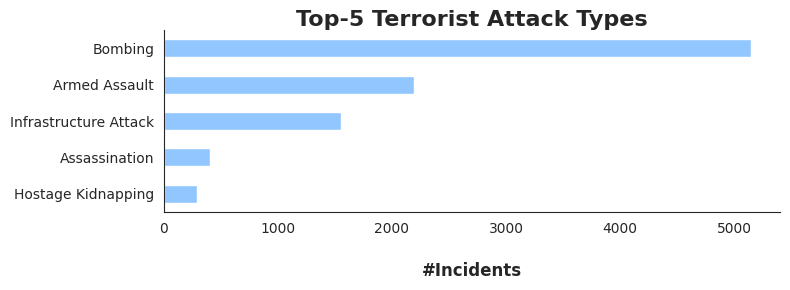

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

gtd['attack_type'].value_counts().head(5).sort_values().plot(kind='barh',ax=ax, legend=False)

ax.set_title('Top-5 Terrorist Attack Types', weight='bold', fontsize=16, pad=3)
ax.set_xlabel('\n#Incidents', weight='bold', fontsize=12)
ax.set_ylabel('')

sns.despine()
plt.tight_layout()
plt.savefig('images/5_top5_attack_types.png')
plt.show()

<font color='orange'><b>Observations</b></font>

- Explosives-based tactics dominate European terrorism.
- Assaults and infrastructure sabotage reflect conflict zones, supporting hybrid warfare operations.
- The tactical landscape is heavily dependent on cheap, scalable tools.
- Explosives and firearms dominate.

#### <font color='coral'>Lethality</font>

In [ ]:
lethality = (gtd[gtd.fatalities_total != 'UKN']
             .groupby('attack_type')
             .agg(avg_fatalities=('fatalities_total', 'mean'),
                  count=('attack_type', 'size'))
             .sort_values('avg_fatalities', ascending =False)
             )

lethality

,avg_fatalities,count
attack_type,,
Barricade Hostage,13.914894,47
UKN,2.476923,195
Hijacking,1.552632,38
Armed Assault,1.306422,2180
Bombing,0.962047,5138
Assassination,0.865337,401
Hostage Kidnapping,0.665505,287
Unarmed Assault,0.254144,181
Infrastructure Attack,0.016088,1554


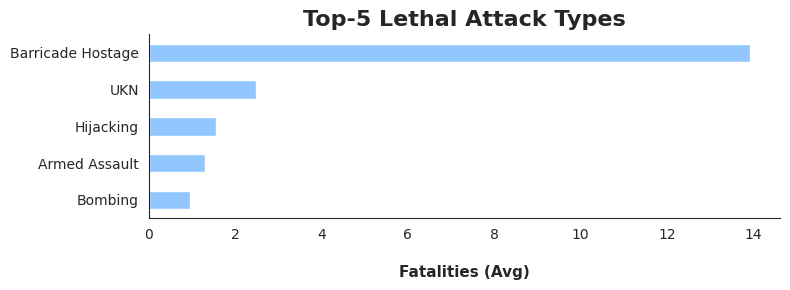

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

lethality.head(5).plot(kind='barh',ax=ax, legend=False, y='avg_fatalities')
ax.set_title('Top-5 Lethal Attack Types', weight='bold', fontsize=16)
ax.set_xlabel('\nFatalities (Avg)', weight='bold', fontsize=11)
ax.invert_yaxis()
ax.set_ylabel('')

sns.despine()
plt.tight_layout()
plt.savefig('images/6_top5_avg_fatalities_per_attack.png')
plt.show()

<font color='orange'><b>Observations</b></font>

⚠️  Barricade Hostage = most lethal per event

- Despite accounting for $<$1% of total incidents, these events average nearly 14 deaths each.

- High-impact, low-frequency $\rightarrow$ demand maximum readiness and coordination.


🎯 Hijackings and Armed Assaults are consistently lethal

- Even if infrequent, these tactics almost always result in fatalities.

- Armed Assaults are critical CT threats.


💣 Bombings = most balanced combination of scale & lethality

- Nearly 1 death per bombing * 5,000+ bombings $\rightarrow$ largest total fatalities.

- Can include bombs, IEDs, and timed devices in public places.


🏭 Infrastructure attacks $\neq$ human casualties

- Almost entirely non-lethal despite 1,500+ incidents.

<font color='lightgreen'><b>Wrapping-up Obj-0</b></font>

*Between 2000 and 2020, terrorism in Europe experienced a **concentrated surge** during 2014 &ndash; 2016, followed by a sharp decline. The `nature` of terrorism evolved from sporadic attacks into **conflict-linked spikes**, especially in Eastern Europe. The `lethality` remained moderate overall, driven by a small number of deadly tactics. The `modus operandi` remained largely unchanged: **bombings and shootings** remained the default tools, while sophisticated or novel tactics remained rare. At the macro level, terrorism in Europe was shaped more by **geopolitical escalation and group reactivation** than by tactical innovation.*